<center><h1>Moore_Andrew_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import numpy
from scipy import linalg

Get the Vertebral Column Data Set

In [2]:
# reference -- https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419

data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.replace(to_replace= b'Abnormal', value = 'AB', inplace=True )
df.replace(to_replace= b'Normal', value = 'NO', inplace=True )

In [3]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,AB
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,AB
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,AB
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,AB
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,AB
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,NO
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,NO
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,NO
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,NO


In [4]:
# now getting the categorical variables to be AB=1, NO=0 
df.replace(to_replace= 'AB', value = 1, inplace=True )
df.replace(to_replace= 'NO', value = 0, inplace=True )
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

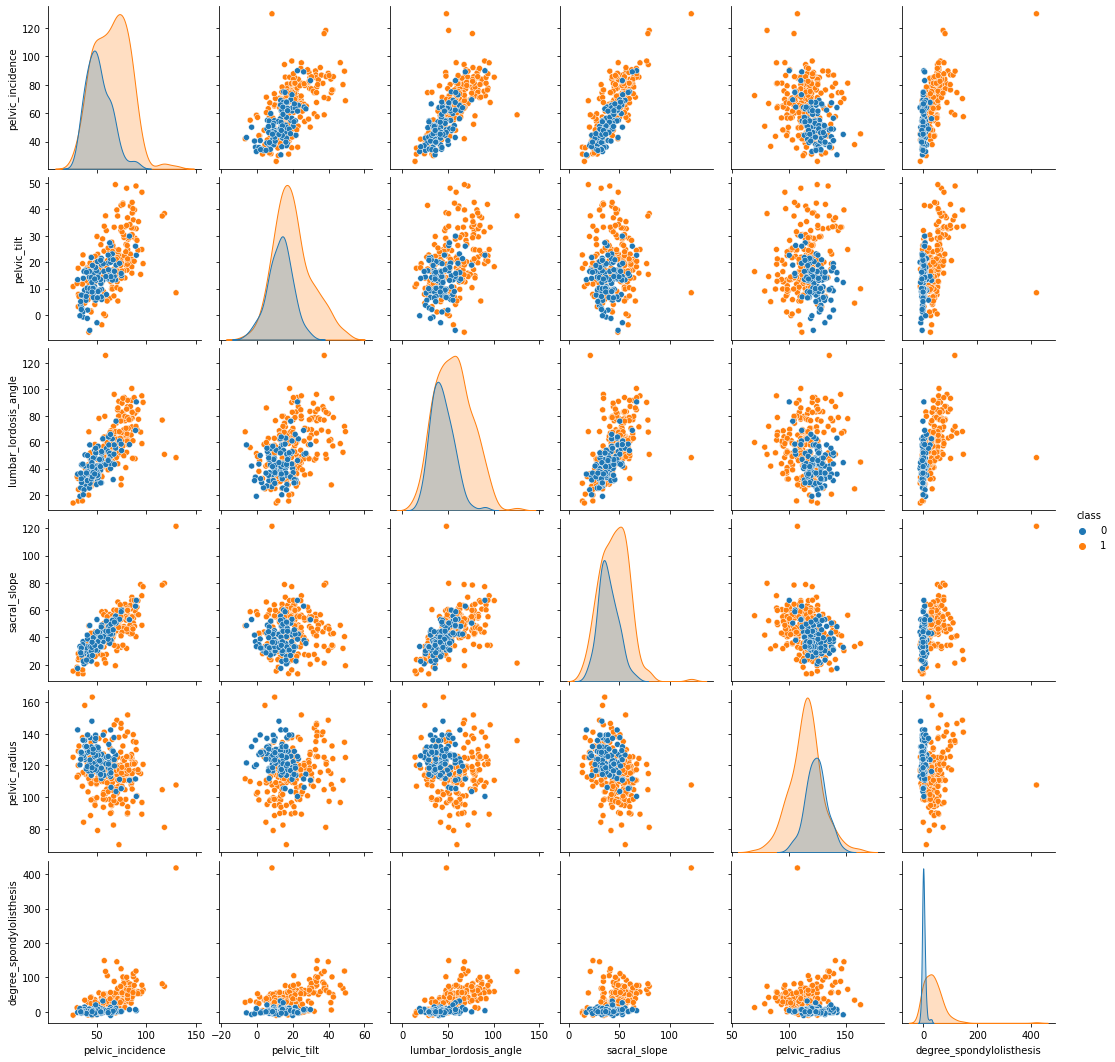

In [5]:
# reference -- https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(df, hue='class')
plt.show()

#### ii. Boxplots

<AxesSubplot:xlabel='column', ylabel='values'>

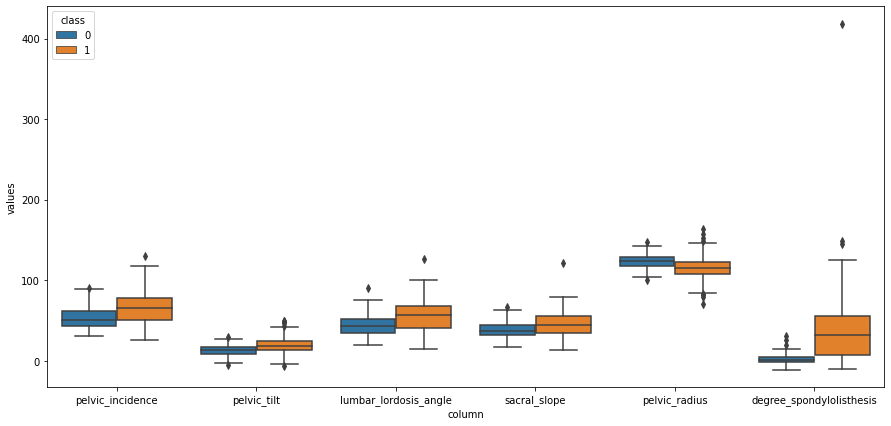

In [6]:
# reference -- https://stackoverflow.com/questions/52392438/plotting-box-plots-of-two-columns-side-by-side-in-seaborn

df_melted = pd.melt(df, "class", var_name="column", value_name="values")
plt.figure(figsize=(15,7))
sns.boxplot(x="column", hue="class", y="values", data=df_melted)

#### iii. Split Data Set

In [7]:
# training 
class_0_first_70_tr = df[df['class']==0]
class_0_first_70_tr.reset_index(drop = True,inplace= True)
class_0_first_70_tr = class_0_first_70_tr.iloc[0:70,:]

class_1_first_140_tr = df[df['class']==1]
class_1_first_140_tr.reset_index(drop = True,inplace= True)
class_1_first_140_tr = class_1_first_140_tr.iloc[0:140,:]
train = pd.concat([class_0_first_70_tr,class_1_first_140_tr],axis = 0)
train.reset_index(drop = True,inplace= True)


# testing
class_0_after_70_te = df[df['class']==0]
class_0_after_70_te.reset_index(drop = True,inplace= True)
class_0_after_70_te = class_0_after_70_te.iloc[70:,:]

class_1_after_140_te = df[df['class']==1]
class_1_after_140_te.reset_index(drop = True,inplace= True)
class_1_after_140_te = class_1_after_140_te.iloc[140:,:]

test = pd.concat([class_0_after_70_te,class_1_after_140_te],axis = 0)
test.reset_index(drop = True,inplace= True)

In [8]:
# train x and y

x_train = train.iloc[:,0:6]
y_train = train.iloc[:,-1]

x_test = test.iloc[:,0:6]
y_test = test.iloc[:,-1]

### (c) Classification

#### i. Euclidean Metric

In [9]:
# reference -- https://towardsdatascience.com/knn-in-python-835643e2fb53

total_k = 209
bestscore = 0
k=0 
best_training_score = 0

training_errors = []
test_errors=[]

for i in reversed(range(total_k)):
    if i > 0:
        
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
        knn.fit(x_train, y_train)
        training_score = knn.score(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        
        # keeping track of the training errors
        error_rate_tr = 1-training_score
        training_errors.append(error_rate_tr)
        
        # keeping track of the test errors
        error_rate_te = 1-current_score
        test_errors.append(error_rate_te)
        
        if current_score>bestscore:
            k = i
            bestscore = current_score
            best_training_score = training_score
            

print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate on the test data")
print("The best k is", k)

# 4 is the best k 

The best accuracy score is 94.0 % and has a 6.0 % error rate on the test data
The best k is 4


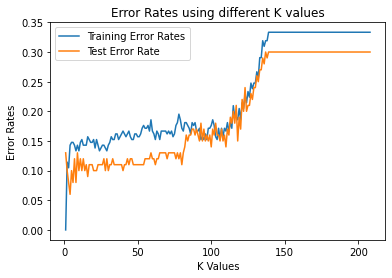

In [10]:
# plotting training errors 

kvalues= list(reversed(range(1, 209)))

error_df = pd.DataFrame(list(zip(training_errors, kvalues)), columns =['Training Error Rates', 'K Values'])
error_df['Test Error Rate'] = test_errors

error_df.plot(x = 'K Values', y = ['Training Error Rates','Test Error Rate'])

plt.ylabel('Error Rates')
plt.title('Error Rates using different K values')
plt.xlabel('K Values')
plt.show()

In [11]:
# seeing there is a training error of 0 for the lowest training error rate for the last question
lowest_training_error = min(training_errors)
print(lowest_training_error)

0.0


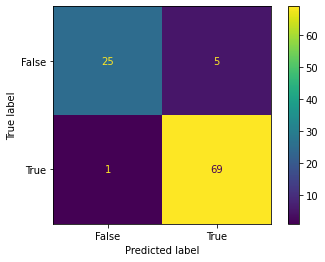

In [12]:
# confusion matrix
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
matrix.plot()

In [13]:
true_positive = (confusion_matrix[1][1])/ (confusion_matrix[1][1] + confusion_matrix[1][0])
print("The true positive rate is", true_positive)
true_negative = (confusion_matrix[0][0])/ (confusion_matrix[0][0] + confusion_matrix[0][1])
print("The true negative rate is", true_negative)
precision = (confusion_matrix[1][1])/ (confusion_matrix[1][1] + confusion_matrix[0][1])
print("The presision score is", precision)
f1_score= (2*precision*true_positive)/ (precision+true_positive)
print("The f1 score is", f1_score)

The true positive rate is 0.9857142857142858
The true negative rate is 0.8333333333333334
The presision score is 0.9324324324324325
The f1 score is 0.9583333333333333


#### ii. Test Data

#### iii. Learning Curve

In [14]:
# preparing the data and variables 
# creating loop for n and k

# reference -- https://towardsdatascience.com/knn-in-python-835643e2fb53

error_rates = []
list_n = []

for n in range(10,220,10):
    class_0 = int(n//3)
    class_1 = int(n - (n//3))
    
    # splitting the dataframe 
    n1= class_0_first_70_tr.iloc[0:class_0,:]
    n2= class_1_first_140_tr.iloc[0:class_1,:]
    
    train = pd.concat([n1,n2],axis = 0)
    train = train.reset_index(drop = True)
    
    train_x = train.iloc[:,0:6]
    train_y = train.iloc[:,-1]
    
    best_score = 0
    
    # finding the best k 
    for k in range(1,6):
        knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        knn.fit(train_x,train_y)
        y_pred = knn.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        
        # finding the best accuracy score
        if score>best_score:
            best_score = score    
            
    # getting the misclassification rate and appending to the list
    misclassification_rate = 1-best_score
    error_rates.append(misclassification_rate)
    list_n.append(n)

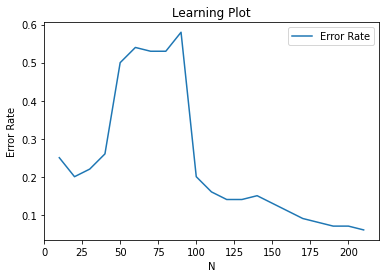

In [15]:
# now plotting 

learning_curve = pd.DataFrame(list(zip(error_rates, list_n)), columns =['Error Rate', 'N values'])
learning_curve.plot(x = 'N values', y = 'Error Rate')

plt.ylabel('Error Rate')
plt.title('Learning Plot')
plt.xlabel('N')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [16]:
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

bestscore = 0
k= 0

dictionary_k = {}

for i in range(1,200,5):
    if i > 0:
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i,metric='minkowski', p=1)
        knn.fit(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        if current_score>=bestscore:
            k = i
            bestscore = current_score
            dictionary_k[k]=bestscore

print("The best scores are from the following k values", dictionary_k)
print("Too high of a k leads to overfitting (too low of a k is underfitting), therefore we choose 6")

manhattan_distance_error= 1-bestscore
manhattan_distance_k = 6
# 6 is the best k

The best scores are from the following k values {1: 0.89, 6: 0.89, 11: 0.89, 26: 0.89}
Too high of a k leads to overfitting (too low of a k is underfitting), therefore we choose 6


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [17]:
# reference -- # reference -- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

bestscore = 0
numbers = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
p = 0

for i in numbers:
    if i > 0:
        # finding the best k
        p_value = 10**i
        knn = KNeighborsClassifier(n_neighbors = 6,metric='minkowski', p=p_value)
        knn.fit(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        if current_score>bestscore:
            p = i
            bestscore = current_score

print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate")
print("The best p is", p)

log10_p_error= 1-bestscore
log10_p = p


The best accuracy score is 94.0 % and has a 6.0 % error rate
The best p is 0.6


##### C. Chebyshev Distance With p -> infinity.

In [18]:
# reference -- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


bestscore = 0
k= 0

for i in range(1,200,5):
    if i > 0:
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i,metric='chebyshev', p=float('inf'))
        knn.fit(x_train, y_train)
        training_score = knn.score(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        if current_score>bestscore:
            k = i
            bestscore = current_score

print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate")
print("The best k is", k)
chebyshev_distance_error= 1-bestscore
chebyshev_distance_k = k


The best accuracy score is 92.0 % and has a 8.0 % error rate
The best k is 16


#### ii. Mahalanobis Distance.

In [19]:
# Reference -- https://numpy.org/doc/stable/reference/generated/numpy.cov.html
# Reference -- https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv
# Reference -- https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics
# Reference -- https://stackoverflow.com/questions/70075389/sklearn-nearestneighbors-with-mahalanobis-distance-returns-error-for-slice-of-ar


bestscore = 0
k= 0

# taking the covariance of t
cov = np.cov(x_train,rowvar=False)
# taking the p inverse of covariance of the x_train
pinv = linalg.pinv(cov)

for i in range(1,200,5):
    if i > 0:
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i,metric='mahalanobis',metric_params={'VI': pinv})
        knn.fit(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        if current_score>bestscore:
            k = i
            bestscore = current_score
            
print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate")
print("The best k is", k)


mahalanobis_distance_error= 1-bestscore
mahalanobis_distance_k = k

The best accuracy score is 85.0 % and has a 15.0 % error rate
The best k is 1


In [20]:
distances = ['Manhattan distance','Minkowski Distance with log10(p)','Chebyshev Distance','Mahalanobis Distance']
values = [manhattan_distance_k,log10_p,chebyshev_distance_k,mahalanobis_distance_k]
error = [manhattan_distance_error,log10_p_error,chebyshev_distance_error,mahalanobis_distance_error]

table = pd.DataFrame(list(zip(distances, values,error)), columns = ['Distance Metrics', 'Values (best K or P)','Test Error'])

table

,Distance Metrics,Values (best K or P),Test Error
0,Manhattan distance,6.0,0.11
1,Minkowski Distance with log10(p),0.6,0.06
2,Chebyshev Distance,16.0,0.08
3,Mahalanobis Distance,1.0,0.15


### (e) Weighted Decision

In [21]:
# Euclidean Distance
# Reference --  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

bestscore = 0
k= 0
for i in range(1,200,5):
    if i > 0:
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i,metric='euclidean', weights = 'distance')
        knn.fit(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        if current_score>=bestscore:
            k = i
            bestscore = current_score
            
print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate")
print("The best k is", k)

euclidean_distance_error_weighted= 1-bestscore
euclidean_distance_weighted_k = k

The best accuracy score is 90.0 % and has a 10.0 % error rate
The best k is 6


In [22]:
# Manhattan Distance 

# Reference --  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


bestscore = 0
k= 0
for i in range(1,200,5):
    if i > 0:
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i,metric='minkowski', p=1, weights = 'distance')
        knn.fit(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        
        if current_score>=bestscore:
            k = i
            bestscore = current_score
            besterror = 1-(knn.score(x_train, y_train))

            
            
            
print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate")
print("The best k is", k)
manhattan_distance_error_weighted= 1-bestscore
manhattan_distance_weighted_k = k

The best accuracy score is 90.0 % and has a 10.0 % error rate
The best k is 26


In [23]:
# chebyshev distance 

# Reference --  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


bestscore = 0
k= 0

for i in range(1,200,5):
    if i > 0:
        # finding the best k
        knn = KNeighborsClassifier(n_neighbors = i,metric='chebyshev', p=float('inf'), weights = 'distance')
        knn.fit(x_train, y_train)
        training_score = knn.score(x_train, y_train)
        y_pred_test = knn.predict(x_test)
        current_score = accuracy_score(y_test, y_pred_test)
        if current_score>bestscore:
            k = i
            bestscore = current_score

print("The best accuracy score is", bestscore*100,"% and has a", round((1-bestscore)*100,4), "% error rate")
print("The best k is", k)

chebyshev_distance_error_weighted= 1-bestscore
chebyshev_distance_weighted_k = k

The best accuracy score is 89.0 % and has a 11.0 % error rate
The best k is 16


In [24]:
distances = ['Euclidean distance','Chebyshev Distance','Manhattan Distance']
values = [euclidean_distance_weighted_k,chebyshev_distance_weighted_k,manhattan_distance_weighted_k]
error = [euclidean_distance_error_weighted,chebyshev_distance_error_weighted,manhattan_distance_error_weighted]

table = pd.DataFrame(list(zip(distances, values,error)), columns = ['Weighted Distance Metrics', 'Best K','Test Error'])

table

,Weighted Distance Metrics,Best K,Test Error
0,Euclidean distance,6,0.10
1,Chebyshev Distance,16,0.11
2,Manhattan Distance,26,0.10


### (f) Training Error Rate

In this Homework, the lowest training error I got was 0 in the part C, where we calculated the training rates for each k in the euclidean distance 